In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Load the dataset
df = pd.read_csv('netflix_movies_series_final.csv')
df.head()

,Movie Name,IMDB Rating,Budget (Million $),Revenue (Million $),Avg User Watch Time (Minutes),Type
0,Stranger Legacy,5.4,219.3,404.6,149.0,Series
1,Broken Destiny,9.2,56.2,52.1,165.7,Movie
2,Shadow Reckoning,7.8,104.6,111.8,115.6,Series
3,Final Reckoning,6.9,199.3,261.7,94.7,Series
4,Dark Reckoning,4.0,145.1,205.5,98.3,Series


Step 1: Chi-Square Test of Independence

Chi-Square Test Results
Chi² = 1.0435, p-value = 0.3070, DOF = 1
 No significant association found.


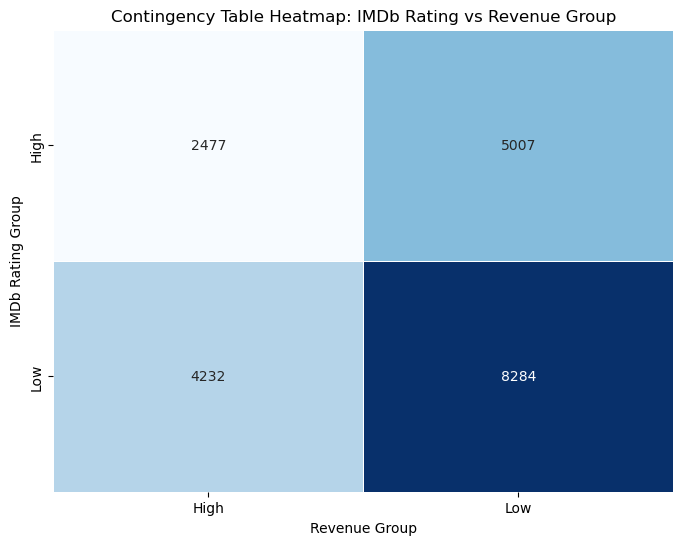

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Categorize variables
df['IMDB_Group'] = df['IMDB Rating'].apply(lambda x: 'High' if x > 7 else 'Low')
df['Revenue_Group'] = df['Revenue (Million $)'].apply(lambda x: 'High' if x > 500 else 'Low')

# Contingency Table
contingency = pd.crosstab(df['IMDB_Group'], df['Revenue_Group'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

# Print Chi-Square Test Results
print("Chi-Square Test Results")
print(f"Chi² = {chi2:.4f}, p-value = {p:.4f}, DOF = {dof}")
if p < 0.05:
    print("✅ Significant association between IMDb rating and revenue.")
else:
    print(" No significant association found.")

# Visualization - Heatmap of the contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency, annot=True, cmap="Blues", fmt="d", cbar=False, linewidths=0.5)
plt.title('Contingency Table Heatmap: IMDb Rating vs Revenue Group')
plt.xlabel('Revenue Group')
plt.ylabel('IMDb Rating Group')
plt.show()


Step 2: F-Test (Test of Variances)

In [28]:
from scipy.stats import f_oneway

# Revenue for both groups
rev_high = df[df['IMDB Rating'] > 7]['Revenue (Million $)'].dropna()
rev_low = df[df['IMDB Rating'] <= 7]['Revenue (Million $)'].dropna()

# F-test is same as one-way ANOVA for 2 groups
f_stat, p_value = f_oneway(rev_high, rev_low)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print(" Variance in revenue is significantly different between the groups.")
else:
    print(" No significant variance difference.")


F-statistic: 2.2173
p-value: 0.1365
 No significant variance difference.


step 3: ANOVA

ANOVA F-statistic: 1.3206
p-value: 0.2670
No significant difference found.


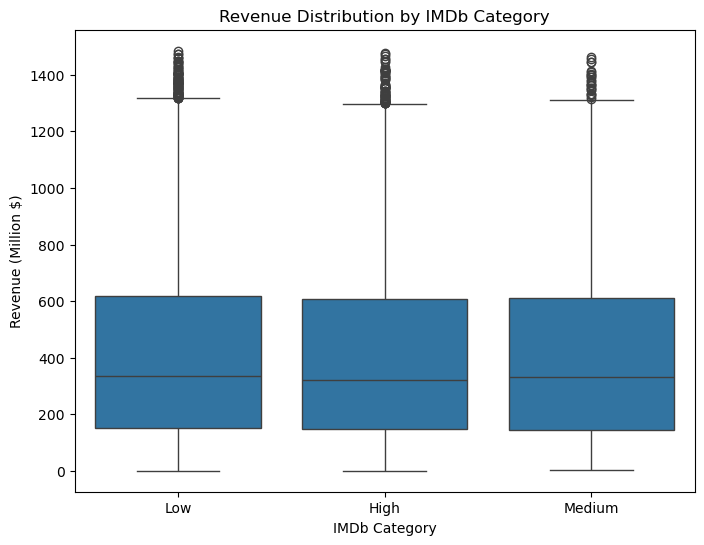

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Create 3 IMDb categories
def imdb_group(rating):
    if rating <= 6:
        return 'Low'
    elif rating <= 7:
        return 'Medium'
    else:
        return 'High'

df['IMDB_Category'] = df['IMDB Rating'].apply(imdb_group)

# Group revenue values
grouped_revenue = [group['Revenue (Million $)'].dropna() for name, group in df.groupby('IMDB_Category')]

# Apply ANOVA
f_stat, p_value = f_oneway(*grouped_revenue)

print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in average revenue across IMDb categories.")
else:
    print("No significant difference found.")

# Visualization - Boxplot of the revenue distribution across IMDb categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='IMDB_Category', y='Revenue (Million $)', data=df)
plt.title('Revenue Distribution by IMDb Category')
plt.xlabel('IMDb Category')
plt.ylabel('Revenue (Million $)')
plt.show()
